In [ ]:
__author__ = 'Phil Baltazar'
__email__  = 'phillusnow@gmail.com'
__website__= 'www.github.com/pbswe'

# 1. Define The Problem

#### A small dataset of the top Spotify songs from the last decade, measured by popularity. 

We would like to know if there is any relation between these top songs and their genre, or artist, or length or any other feature present in this dataset that show us correlation with popularity, or what traits (if any) do popular songs have to each other. 

###### Note: This dataset was downloaded from Kaggle at
https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import preprocessing, metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV,RepeatedStratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
import inspect
import pickle

%matplotlib inline

# 2. Discover

#### -- Loading the data --

In [61]:
df = pd.read_csv('../Spotify/top10s.csv')

In [62]:
# Visualize the data
df.head()

,top10s,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79


#### -- Cleaning the data --

In [63]:
df.columns

Index(['top10s', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [64]:
# Adjusting column/header titles
header = ['Index', 'Title', 'Artist', 'Genre', 'Year', 'BPM',
       'Energy', 'Danceability', 'Loudness dB', 'Liveness', 'Valence',
       'Length', 'Acousticness', 'Speechiness', 'Popularity']
df.columns = header

In [65]:
df = df.drop([0], axis=0)

In [66]:
df.head()

,Index,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [67]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         603 non-null    object
 1   Title         603 non-null    object
 2   Artist        603 non-null    object
 3   Genre         603 non-null    object
 4   Year          603 non-null    object
 5   BPM           603 non-null    object
 6   Energy        603 non-null    object
 7   Danceability  603 non-null    object
 8   Loudness dB   603 non-null    object
 9   Liveness      603 non-null    object
 10  Valence       603 non-null    object
 11  Length        603 non-null    object
 12  Acousticness  603 non-null    object
 13  Speechiness   603 non-null    object
 14  Popularity    603 non-null    object
dtypes: object(15)
memory usage: 75.4+ KB


In [68]:
# Fixing data types. Not all numerical data should be handled as numbers. 
# For example, popularity is shown as numbers but should still be categorical. 

# Calling columns again after fixed:

df.columns

Index(['Index', 'Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy',
       'Danceability', 'Loudness dB', 'Liveness', 'Valence', 'Length',
       'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [72]:
categoricCols = ['Index', 'Title', 'Artist', 'Genre', 'Popularity']
numericCols = ['Year', 'BPM', 'Energy', 'Danceability', 'Loudness dB',
                 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness']

df[categoricCols] = df[categoricCols].astype('category')
df[numericCols] = df[numericCols].astype('int')

In [73]:
# Checking dtypes again to see if they were changed correctly.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Index         603 non-null    category
 1   Title         603 non-null    category
 2   Artist        603 non-null    category
 3   Genre         603 non-null    category
 4   Year          603 non-null    int64   
 5   BPM           603 non-null    int64   
 6   Energy        603 non-null    int64   
 7   Danceability  603 non-null    int64   
 8   Loudness dB   603 non-null    int64   
 9   Liveness      603 non-null    int64   
 10  Valence       603 non-null    int64   
 11  Length        603 non-null    int64   
 12  Acousticness  603 non-null    int64   
 13  Speechiness   603 non-null    int64   
 14  Popularity    603 non-null    category
dtypes: category(5), int64(10)
memory usage: 118.2 KB


In [74]:
# Checking for duplicates
df.duplicated().sum()

0

In [77]:
df.describe()

,Year,BPM,Energy,Danceability,Loudness dB,Liveness,Valence,Length,Acousticness,Speechiness
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000


#### -- Exploring the data (EDA) --

In [79]:
df['Popularity'].value_counts()

72    33
78    27
73    26
76    24
65    23
      ..
96     1
48     1
95     1
93     1
99     1
Name: Popularity, Length: 71, dtype: int64

In [87]:
# Exploring upper and lower quartiles (IQR)
# Will require Popularity dtype change to 'int'.

df['Popularity'] = df['Popularity'].astype('int')

dataset = df.Popularity.describe()
print(dataset)
IQR = dataset['75%']-dataset['25%']
upperlimit = dataset['75%'] + (1.5*IQR)
lowerlimit = dataset['25%'] - (1.5*IQR)
print("The upper outlier limit is", upperlimit)
print("The lower outlier limit is", lowerlimit)

count    603.000000
mean      66.520730
std       14.517746
min        0.000000
25%       60.000000
50%       69.000000
75%       76.000000
max       99.000000
Name: Popularity, dtype: float64
The upper outlier limit is 100.0
The lower outlier limit is 36.0


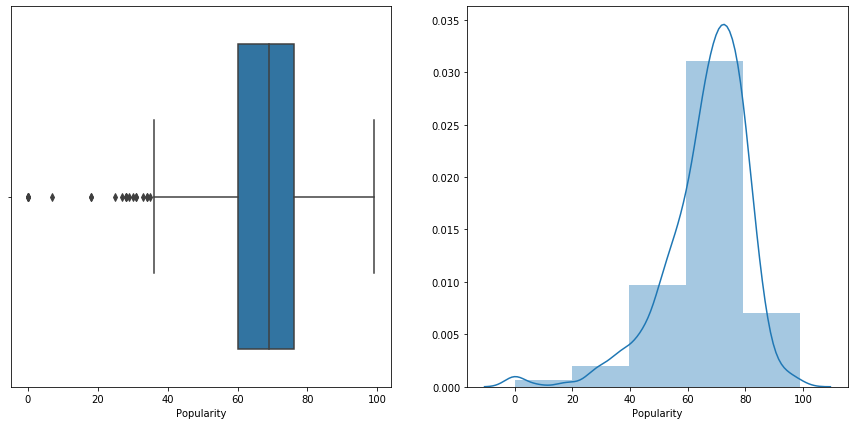

In [93]:
# Explore the target variable, popularity.
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.boxplot(df.Popularity)
plt.subplot(1, 2, 2)
sns.distplot(df.Popularity, bins=5)
plt.show()

In [197]:
# Creating a function to plot the feature variables.
# This will help visualize possible correlation with popularity. 
def plotFeats(df, var): 
    '''
    creates a plot for each feature
    plot1(left), sample distribution
    plot2(right), popularity dependance/relationship
    '''
    plt.figure(figsize = (30, 15))
    plt.subplot(1, 2, 1)
    if df[var].dtype == 'int':
        plt.hist(df[var], bins=5)
    else:
        #change the object datatype of each variable to category type and order their level by the mean salary
        mean = df.groupby(var)['Popularity'].mean()
        df[var] = df[var].astype('category')
        level = mean.sort_values().index.tolist()
        df[var].cat.reorder_categories(level, inplace=True)
        df[var].value_counts().plot(kind='bar')   
    plt.xticks(rotation=45, size=8)
    plt.xlabel(var)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)

    if df[var].dtype == 'int': 
       #Plot the mean salary for each category and shade the line between the (mean - std, mean + std)
        mean = df.groupby(var)['Popularity'].mean()
        std = df.groupby(var)['Popularity'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values,alpha = 0.1)
    else:
        sns.boxplot(x= var, y='Popularity', data= df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Popularity')
    plt.show()
#    plt.savefig("image.png",bbox_inches='tight',dpi=500)

In [207]:
# Plotting every feature against "Popularity", using the function above.
# Starting with categorical values, followed by the numerical values after.

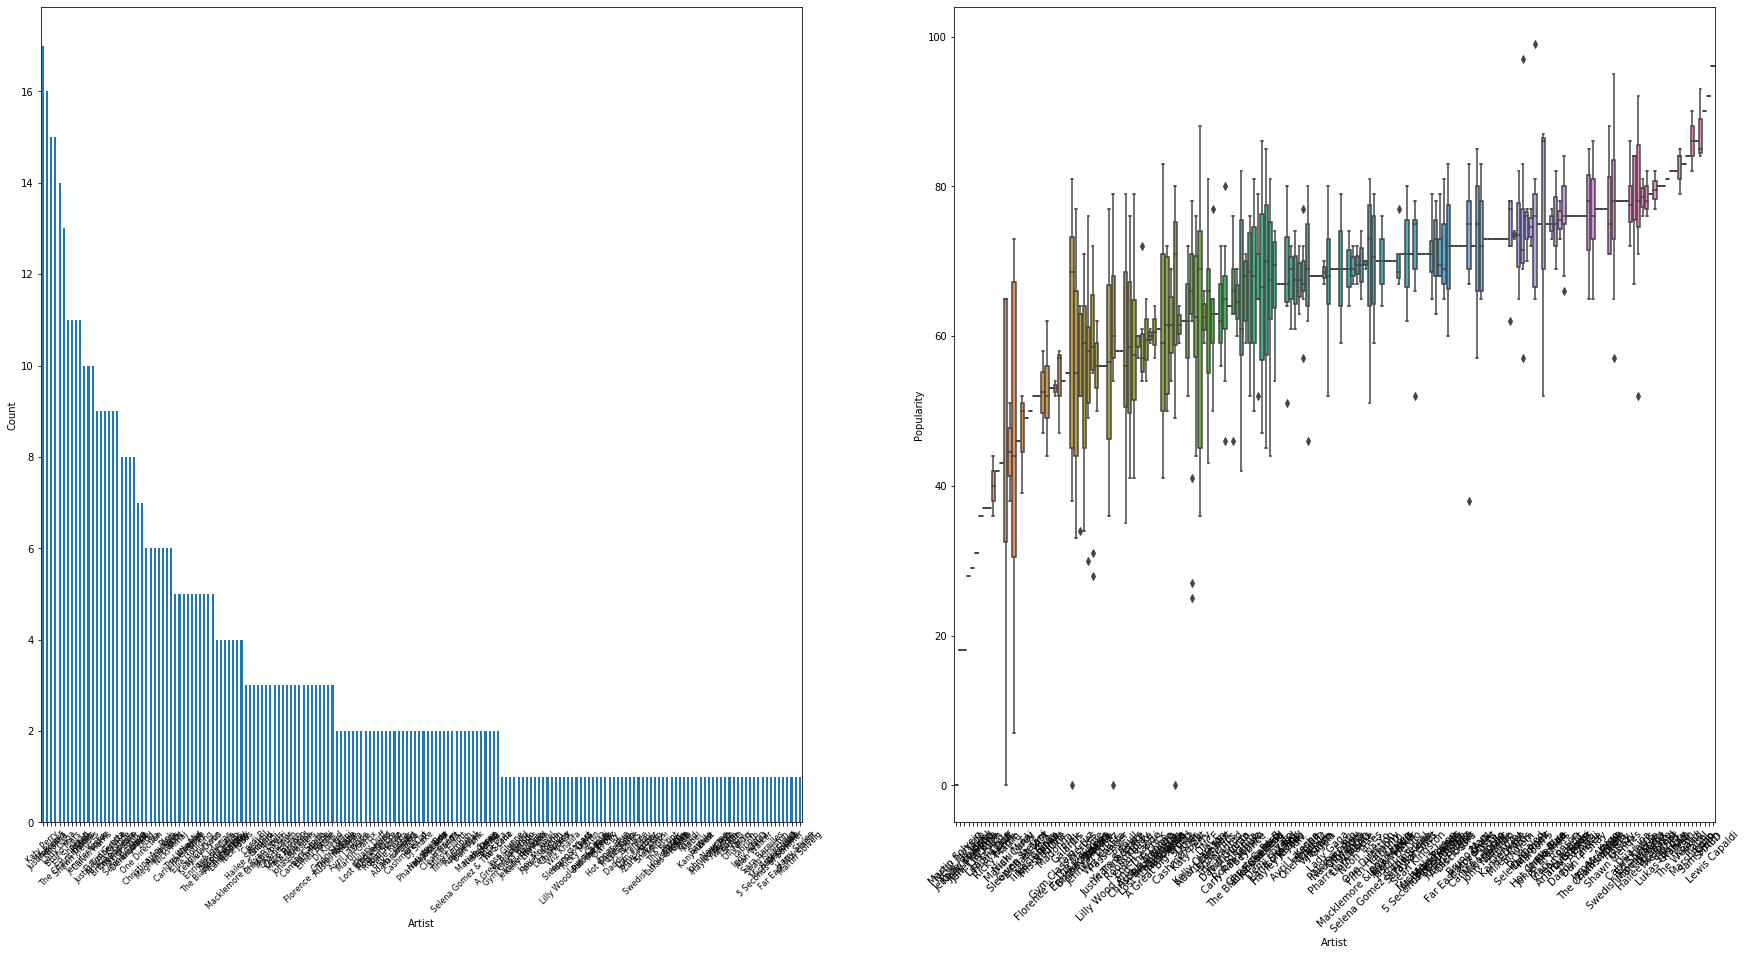

<Figure size 432x288 with 0 Axes>

In [206]:
plotFeats(df, 'Artist')

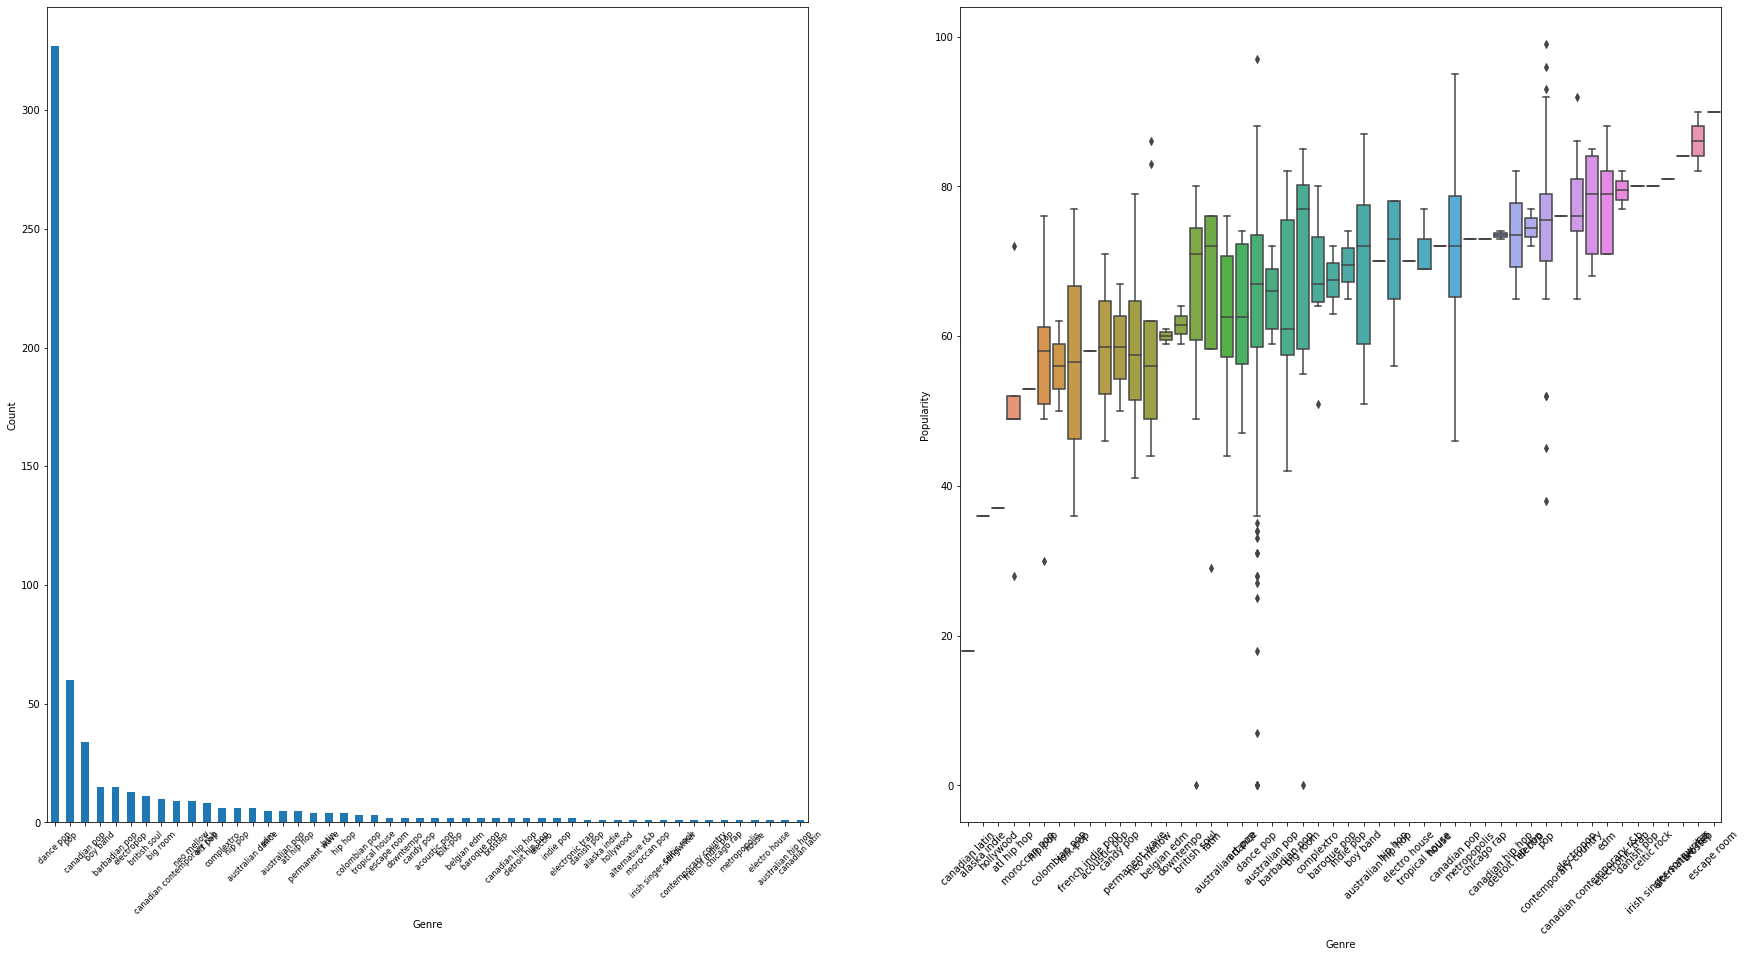

<Figure size 432x288 with 0 Axes>

In [208]:
plotFeats(df, 'Genre')

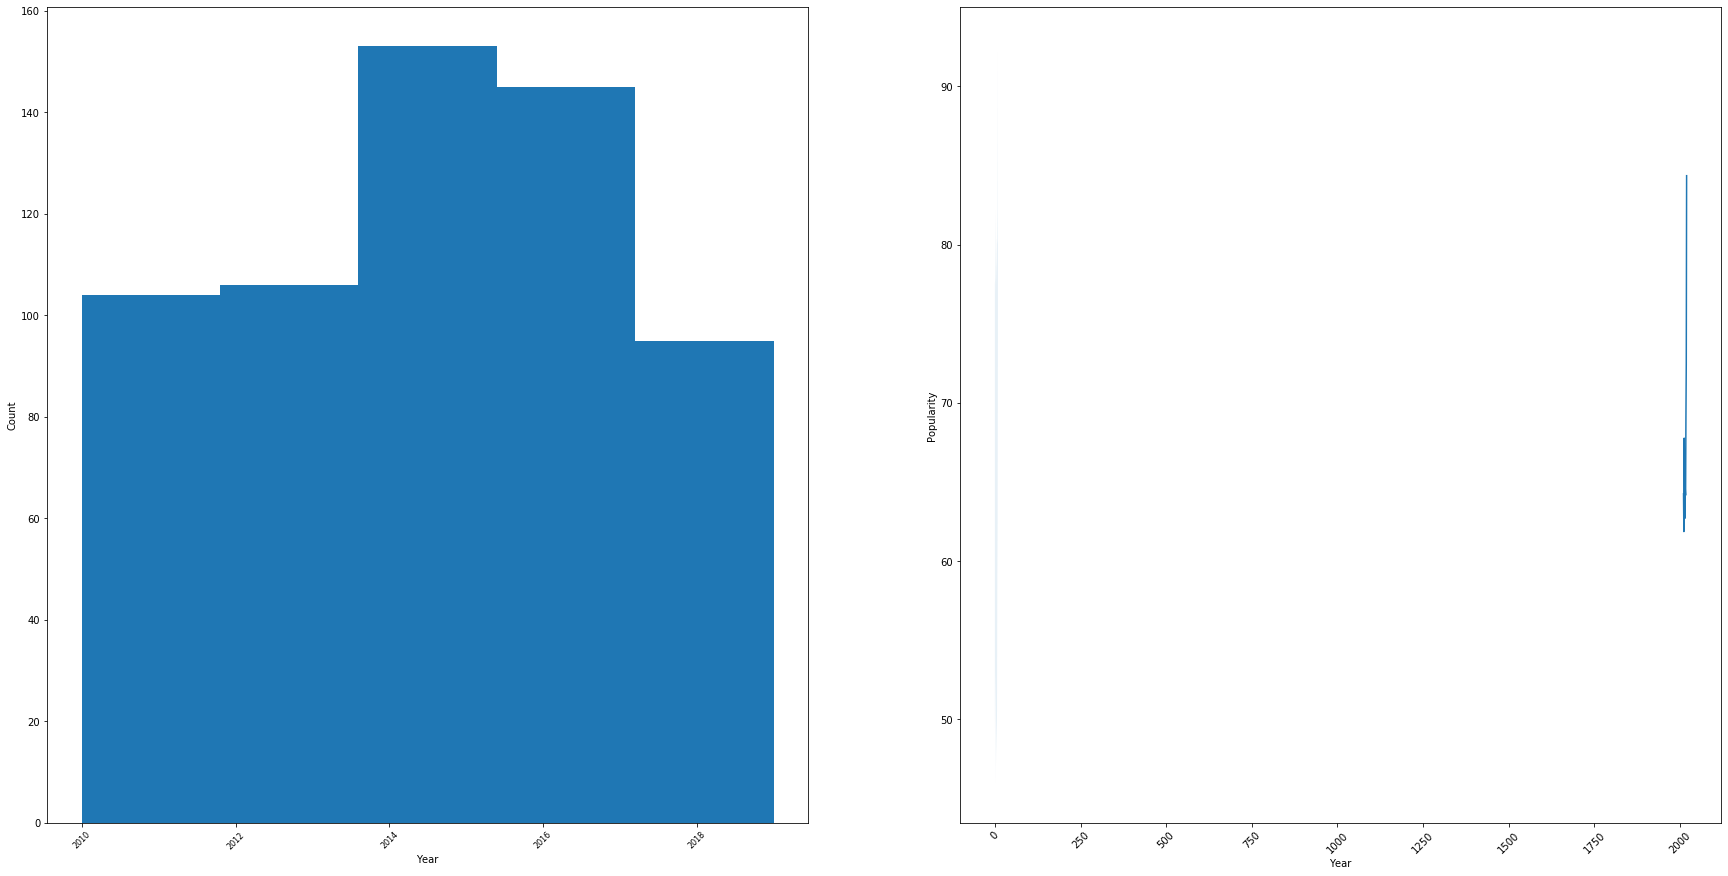

<Figure size 432x288 with 0 Axes>

In [209]:
plotFeats(df, 'Year')

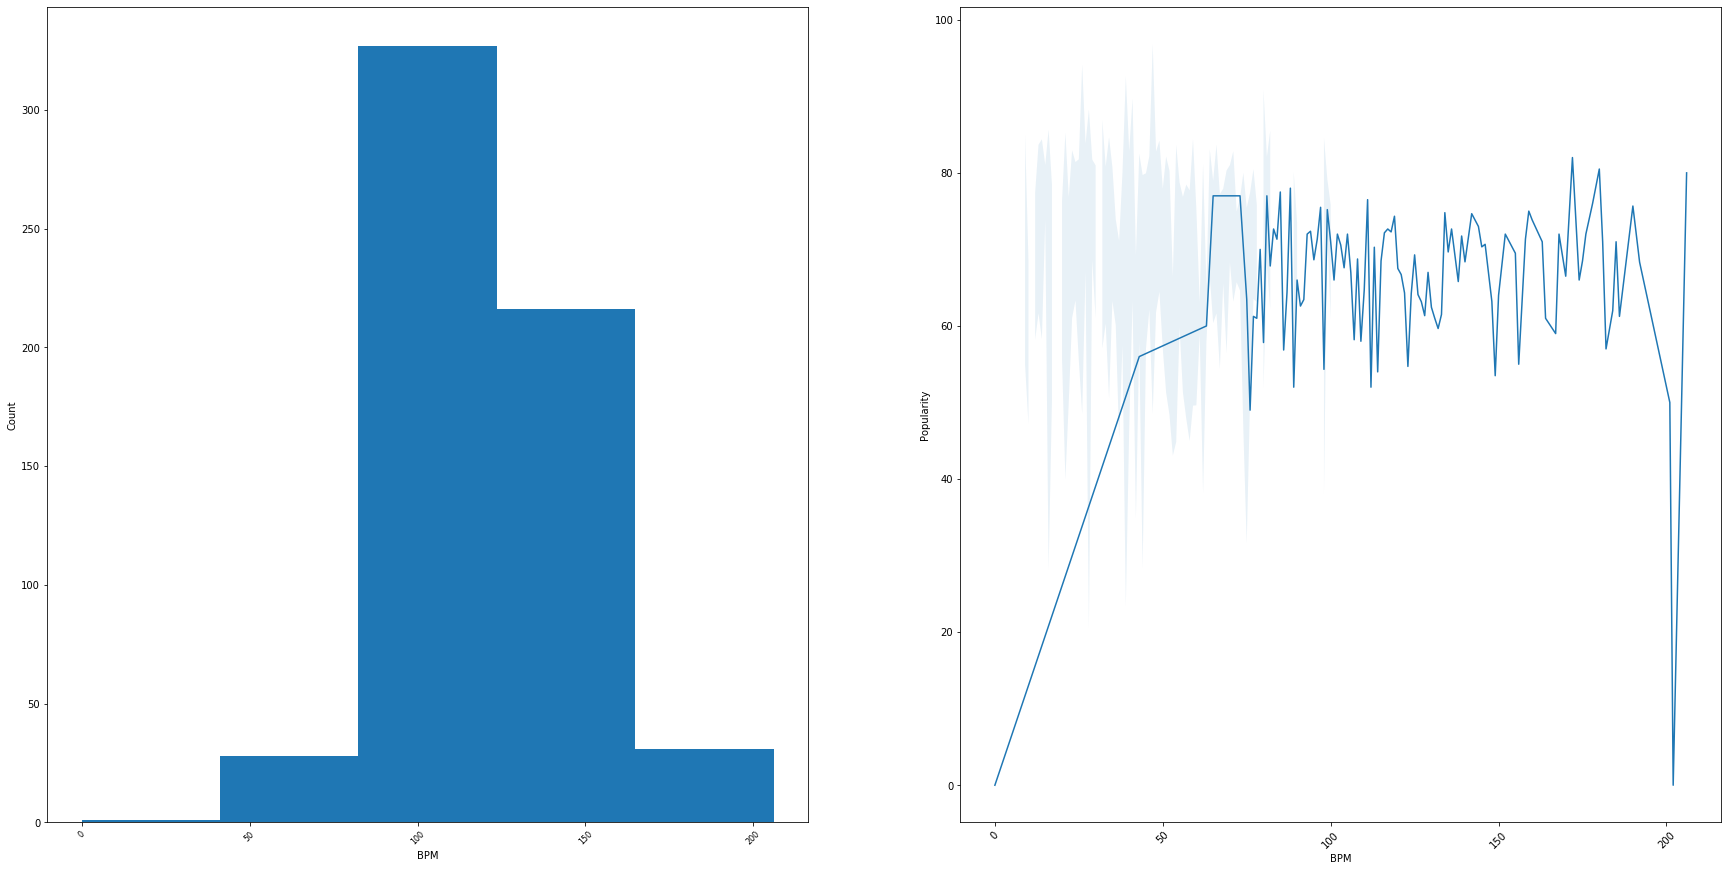

<Figure size 432x288 with 0 Axes>

In [210]:
plotFeats(df, 'BPM')

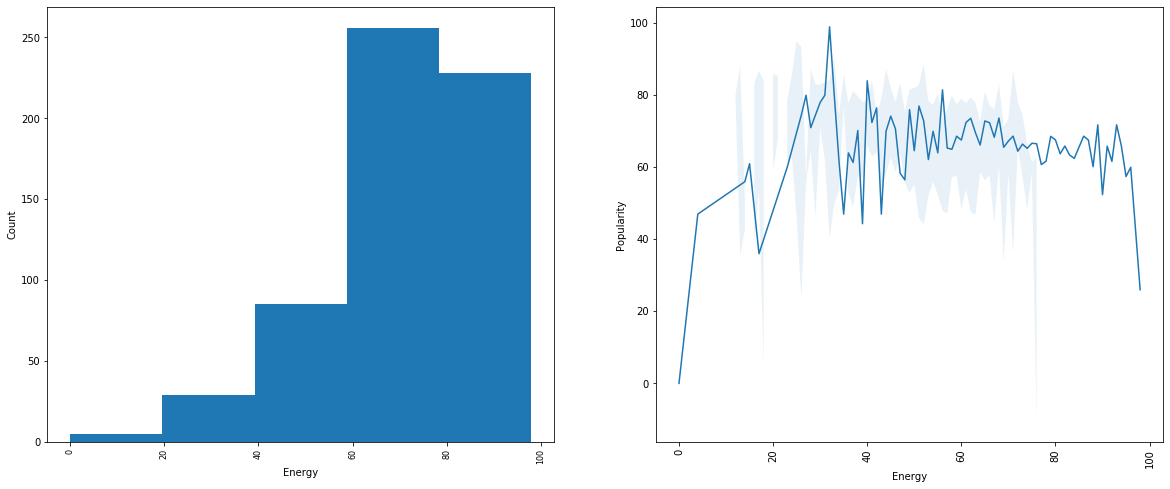

In [152]:
plotFeats(df, 'Energy')

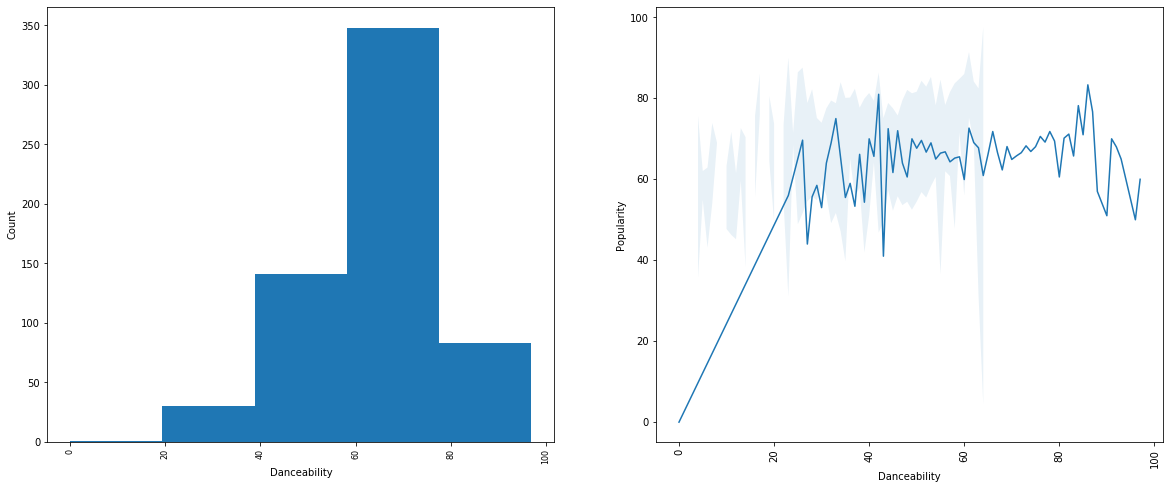

In [153]:
plotFeats(df, 'Danceability')

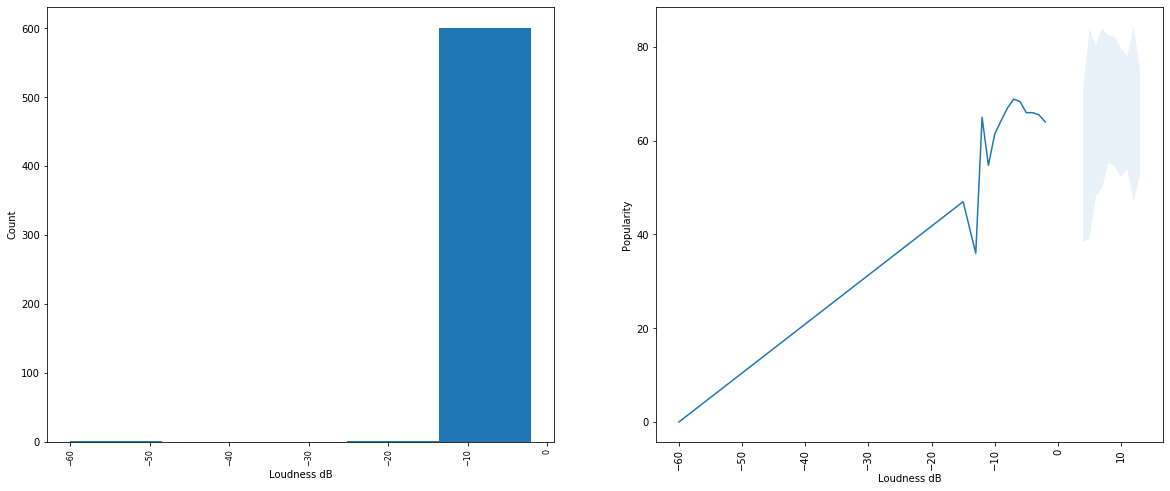

In [154]:
plotFeats(df, 'Loudness dB')

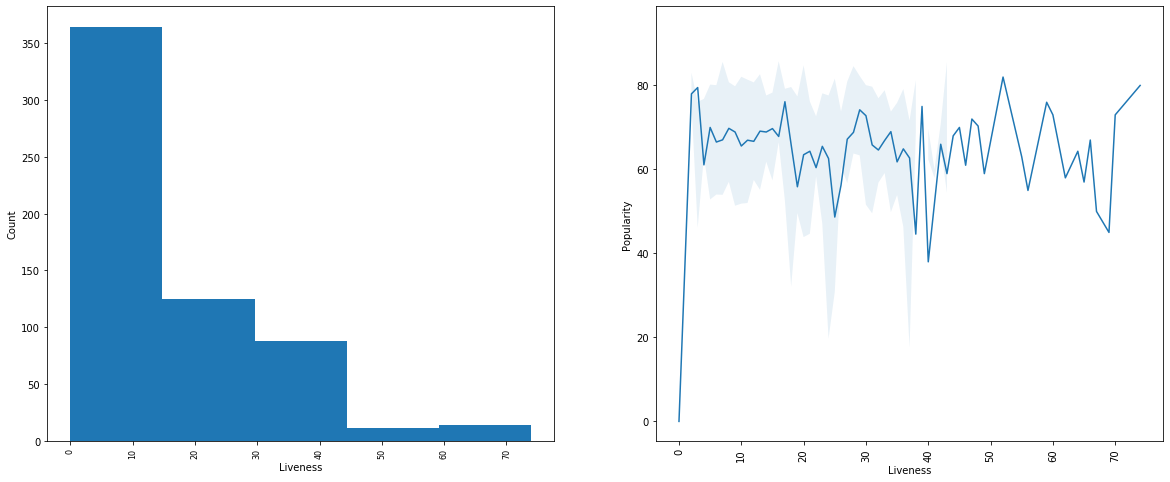

In [155]:
plotFeats(df, 'Liveness')

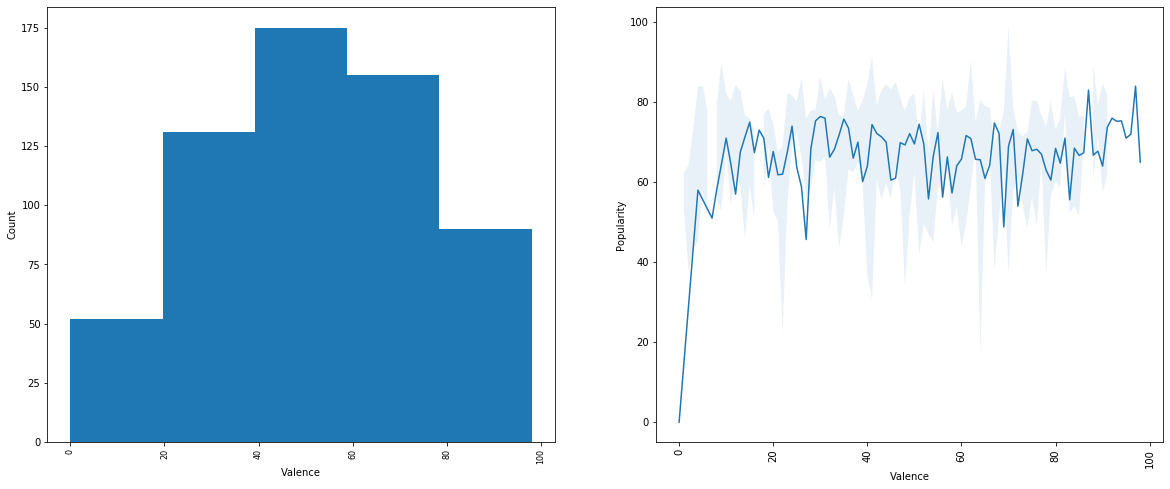

In [156]:
plotFeats(df, 'Valence')

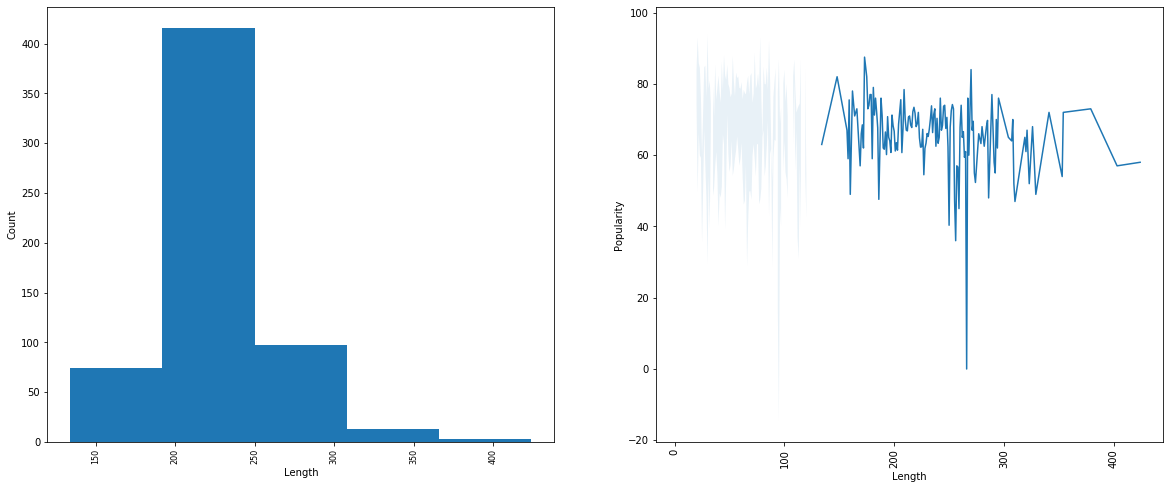

In [157]:
plotFeats(df, 'Length')

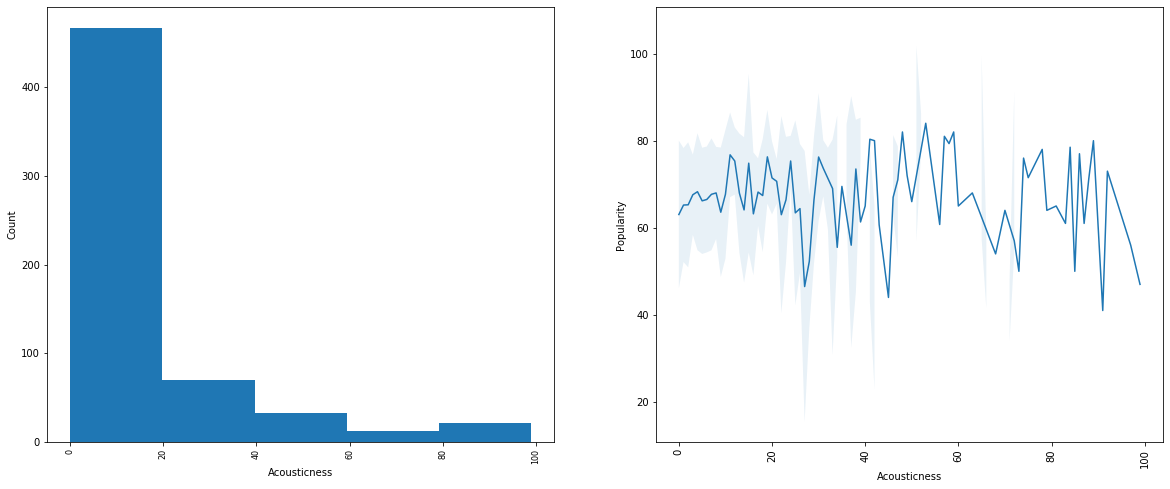

In [158]:
plotFeats(df, 'Acousticness')

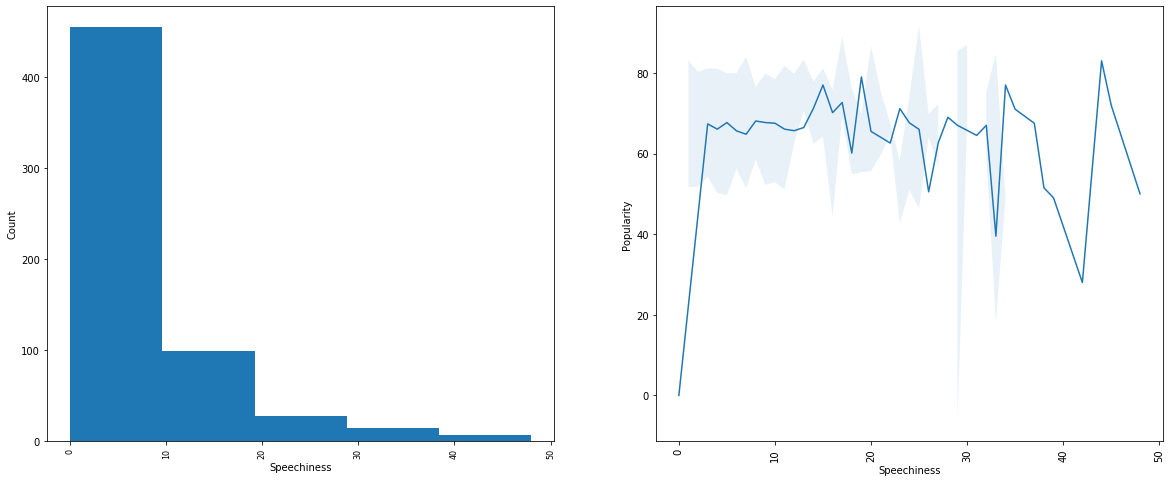

In [159]:
plotFeats(df, 'Speechiness')

###### Our plotted models reveal an interesting insight from our data. 

<i>It turns out that many of our features have a very poor relation with popularity. Because the relationship is poor, this means that these particular features are not correlated with popularity. In other words, these features, which we'll explain below, do not correlate with the popularity of that particular song. There were a few exceptions though... </i>

<br>
Starting from the beginning, let's look at the 3 best features:

<h4>"Artist"</h4>

The Artist plot shows a visible sine wave across the popularity of each song. 

<b>"Does this mean a particular artist has higher chances of releasing a top hit just from being who they are?"</b>

The answer is a bit more complicated than a simple 'yes' or 'no'. We will need to compare artists against other features to gain more insight... (More visualization on Tableau)

<br>
Moving on, second on our list is:
<h4>"Genre"</h4> 
As it has an almost linear correlation with popularity. What does this mean?

Depending on the genre, the likelihood of hitting the top of the charts increases. This doesn't assume that this dataset could simply have more songs of that particular genre, but if believed to be balanced, genre has a strong correlation to popularity. 

<br>
The last one that is worth mentioning:
<h4>Loudness db</h4>

There seems to be, again, a linear correlation to loudness against popularity. Here's an insight from inside the music production world: songs that are professionally and strongly mastered are likely to be heard more times. Loudness here means how clear you can hear that song in a set volume as you play the entire playlist. Each song competes for attention and the louder the sound is without distorting, the better each element will sound, which in turn will increase the likelihood of the song popularity. 

To summarize, loudness increases the popularity based on the assumption that the clearer and more potent all the elements in the song are heard, the better the melody will be perceived and therefore liked, resulting in increased popularity. 